# SEISMIC EVENT PREDICTION

## Name         : AISWARYA SANTHOSH## Organization : Entri Elevate
## Date         : 28/04/2024

## Overview of Problem Statement :
The objective is to develop a machine learning model to predict the magnitude of future seismic events based on various factors such as location, depth, and other related features. The dataset consists of records of seismic events with attributes such as time, depth, magnitude, and location.

By leveraging this historical data, the goal is to create a predictive model that can accurately forecast the magnitude of upcoming earthquakes, aiding in disaster preparedness and risk mitigation. The project involves preprocessing the data, handling missing values, encoding categorical variables, removing outliers, and employing regression algorithms to achieve accurate predictions.

## Objective :
The ultimate goal is to build a predictive model that can accurately forecast the magnitude of seismic events, aiding in early warning systems and disaster management efforts.

## Data Description
Source : https://www.kaggle.com/datasets/mustafakeser4/earthquakes-2023-global

Features : Time: The date and time when the seismic event occurred. Latitude: The latitude coordinate of the seismic event's epicenter. Longitude: The longitude coordinate of the seismic event's epicenter. Depth: The depth at which the seismic event occurred, measured in kilometers. Mag: The magnitude of the seismic event, which is the target variable we aim to predict. MagType: The scale used to measure the magnitude of the seismic event (e.g., ML, MW). Nst: The number of seismic stations that reported the event. Gap: The azimuthal gap between the stations, measured in degrees. Dmin: The horizontal distance from the seismic event to the nearest station, measured in degrees. Rms: The root mean square of the residuals (travel time residuals) of the seismic event. Net: The network that reported the seismic event. ID: A unique identifier for the seismic event. Updated: The time when the event information was last updated. Place: A description of the location where the seismic event occurred. Type: The type of seismic event (e.g., earthquake, explosion). HorizontalError: The horizontal uncertainty of the event location, measured in kilometers. DepthError: The uncertainty in the depth measurement, measured in kilometers. MagError: The uncertainty in the magnitude measurement. MagNst: The number of stations contributing to the magnitude calculation. Status: The status of the event (e.g., reviewed, automatic). LocationSource: The source of the location data. MagSource: The source of the magnitude data.

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
# loading dataset
df=pd.read_csv("Earthquakes_2023_global.csv")

In [4]:
# display first 5 rows of the dataset
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,...,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us
1,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,...,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,43.0,reviewed,us,us
2,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,...,2023-03-11T22:51:29.040Z,Puerto Rico region,earthquake,0.91,15.950,0.090,16.0,reviewed,pr,pr
3,2023-01-01T04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,...,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,5.0,reviewed,us,us
4,2023-01-01T04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,...,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,reviewed,us,us


In [5]:
# shape of the dataset
df.shape

(26642, 22)

In [6]:
# display the data type, non-null counts and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26642 entries, 0 to 26641
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             26642 non-null  object 
 1   latitude         26642 non-null  float64
 2   longitude        26642 non-null  float64
 3   depth            26642 non-null  float64
 4   mag              26642 non-null  float64
 5   magType          26642 non-null  object 
 6   nst              25227 non-null  float64
 7   gap              25225 non-null  float64
 8   dmin             24776 non-null  float64
 9   rms              26642 non-null  float64
 10  net              26642 non-null  object 
 11  id               26642 non-null  object 
 12  updated          26642 non-null  object 
 13  place            25034 non-null  object 
 14  type             26642 non-null  object 
 15  horizontalError  25093 non-null  float64
 16  depthError       26642 non-null  float64
 17  magError    

In [7]:
# statistical summary
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,26642.000000,26642.000000,26642.000000,26642.000000,25227.000000,25225.000000,24776.000000,26642.000000,25093.000000,26642.000000,24970.000000,25065.000000
mean,16.852798,-11.487497,67.491224,4.007395,42.571332,124.930971,2.692908,0.581575,7.017267,4.475056,0.122735,33.315939
std,30.389200,130.053399,116.762456,0.794423,37.662352,67.430145,4.043568,0.256276,4.072365,4.451649,0.102271,48.022567
min,-65.849700,-179.998700,-3.370000,2.600000,0.000000,8.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,-6.415275,-149.608650,10.000000,3.220000,19.000000,73.000000,0.612000,0.410000,4.140000,1.848000,0.080000,10.000000
50%,18.884167,-64.811833,21.998000,4.300000,30.000000,111.000000,1.579000,0.590000,7.060000,2.019000,0.111000,18.000000
75%,41.827950,126.965100,66.833000,4.500000,52.000000,165.000000,3.172000,0.750000,9.730000,6.669000,0.150000,36.000000
max,86.593900,179.999400,681.238000,7.800000,423.000000,350.000000,50.820000,1.880000,99.000000,60.670000,4.490000,884.000000


In [8]:
# display columns
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

###  Data Preprocessing - Data Cleaning

In [9]:
# checking the null values
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1415
gap                1417
dmin               1866
rms                   0
net                   0
id                    0
updated               0
place              1608
type                  0
horizontalError    1549
depthError            0
magError           1672
magNst             1577
status                0
locationSource        0
magSource             0
dtype: int64

#### We can observe that there are null values in 7 columns in the dataset. Lets handle missing values using appropriate imputation techniques

In [10]:
# fill numerical columns with mean()
df["nst"].fillna(df["nst"].mean(), inplace = True)
df["gap"].fillna(df["gap"].mean(), inplace = True)
df["dmin"].fillna(df["dmin"].mean(), inplace = True)
df["horizontalError"].fillna(df["horizontalError"].mean(), inplace = True)
df["magError"].fillna(df["magError"].mean(), inplace = True)
df["magNst"].fillna(df["magNst"].mean(), inplace = True)
df["magNst"].fillna(df["magNst"].mean(), inplace = True)

# fill categorical column with mode[]
df["place"].fillna(df["place"].mode()[0], inplace = True)

In [11]:
# duplicated value sum
df.duplicated().sum()

1960

In [12]:
# to find the number of duplicated rows
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate rows: 1960


In [13]:
# to remove duplicated row
df.drop_duplicates(inplace = True)

In [14]:
# verify that duplicate have been removed
print("Number of duplicate rows after removal:", len(df[df.duplicated()]))

Number of duplicate rows after removal: 0


In [15]:
# display remaining missing values after handling
df.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64

In [16]:
df["mag"].value_counts()

mag
4.40    2205
4.30    2083
4.50    1960
4.20    1773
4.60    1502
        ... 
2.90       1
4.37       1
4.36       1
2.76       1
5.25       1
Name: count, Length: 233, dtype: int64

In [17]:
df["type"].value_counts()

type
earthquake           24471
mining explosion       167
ice quake               26
volcanic eruption       10
explosion                3
quarry blast             2
Landslide                2
landslide                1
Name: count, dtype: int64

#### Drop id column, it does not contain any relevent information. so we can drop it

In [18]:
df.drop("id", axis = 1, inplace = True)

#### Shifting mag column to last for convinence

In [19]:
mag_level_index = df.columns.get_loc("mag")

columns = list(df.columns[:mag_level_index]) + list(df.columns[mag_level_index+1:]) + ["mag"]

df = df[columns]
df.tail(1)

,time,latitude,longitude,depth,magType,nst,gap,dmin,rms,net,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,mag
26641,2023-12-29T16:31:16.656Z,25.105,96.5309,10.0,mb,53.0,64.0,4.156,0.78,us,...,"92 km WSW of Myitkyina, Myanmar",earthquake,7.85,1.876,0.071,64.0,reviewed,us,us,5.0


### Detect Outliers Using IQR Method
Outliers can be detected using the IQR (Interquartile Range) method.

In [20]:
# Select the numerical columns for detecting outliers
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [21]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numerical column
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Determine the outlier step
outlier_step = 1.5 * IQR

In [22]:
# Detect outliers and store their indices
outliers_indices = df[((df[numeric_columns] < (Q1 - outlier_step)) | (df[numeric_columns] > (Q3 + outlier_step))).any(axis=1)].index

In [23]:
# Get the number of outliers
print(f'Number of outliers detected: {len(outliers_indices)}')

Number of outliers detected: 8949


### Outlier visualization

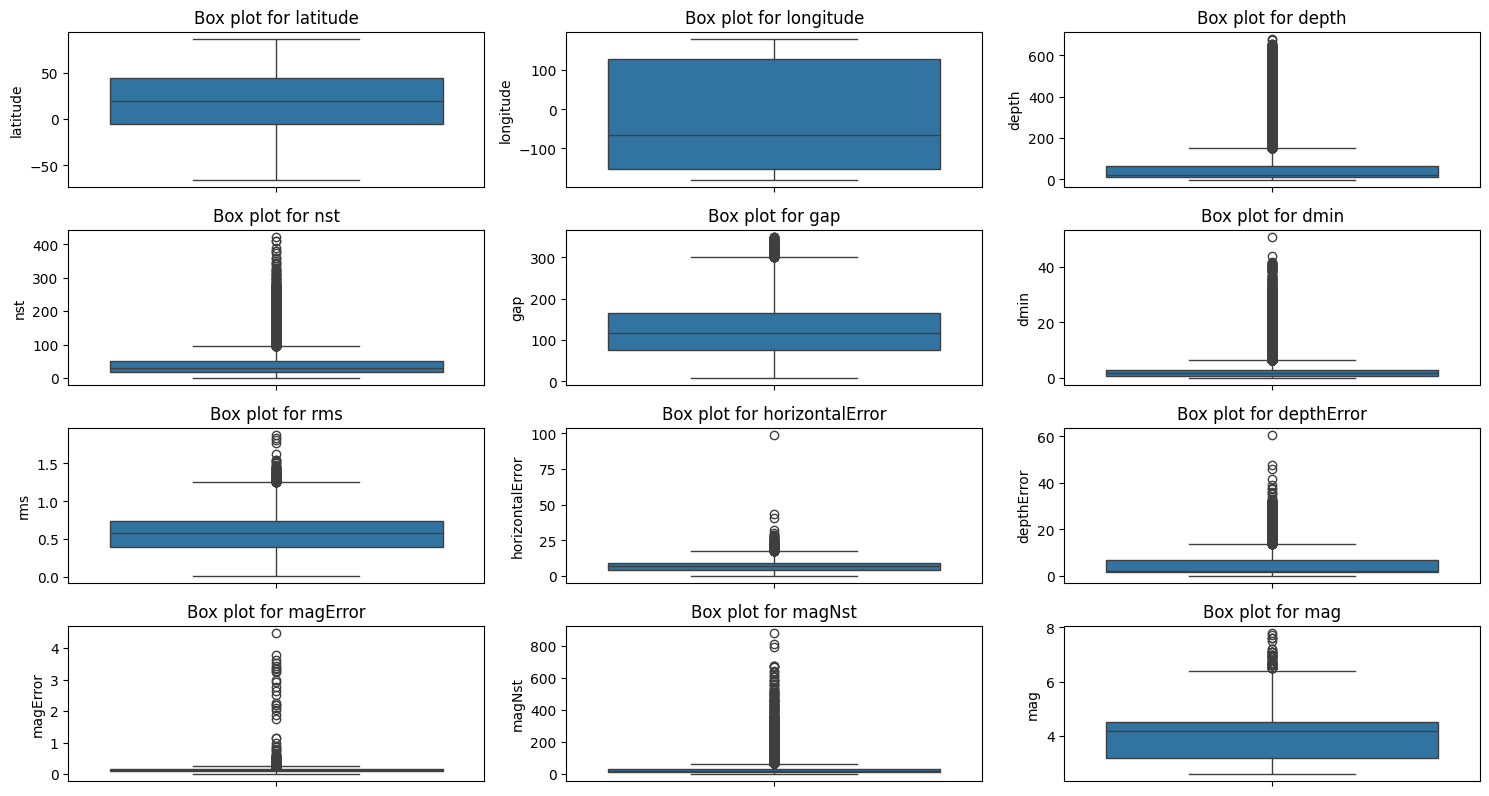

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a box plot for each numerical feature
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot for {column}')

plt.tight_layout()
plt.show()

### Outlier Removal
Now, let's remove the detected outliers.

In [25]:
# Remove the outliers from the dataframe
df_clean = df.drop(outliers_indices).reset_index(drop=True)

In [26]:
# Display the cleaned dataframe summary
print(df_clean.describe())

           latitude     longitude         depth           nst           gap  \
count  15733.000000  15733.000000  15733.000000  15733.000000  15733.000000   
mean      23.217617    -21.288825     34.354511     32.158666    136.822269   
std       28.569887    130.531630     35.787761     17.715277     62.121518   
min      -61.074200   -179.998700     -3.370000      0.000000     20.000000   
25%        2.022700   -154.929600     10.000000     18.000000     89.000000   
50%       26.833500    -66.954333     15.350000     28.000000    124.930971   
75%       51.423800    126.699700     46.000000     42.571332    182.000000   
max       84.881800    179.999400    150.808000     96.000000    300.000000   

               dmin           rms  horizontalError    depthError  \
count  15733.000000  15733.000000     15733.000000  15733.000000   
mean       1.703548      0.556190         6.061166      3.538540   
std        1.426286      0.261227         3.519352      3.054219   
min        0.000

In [27]:
# Check the shape of the original and cleaned dataframe
print(f'Original dataframe shape: {df.shape}')
print(f'Cleaned dataframe shape: {df_clean.shape}')

Original dataframe shape: (24682, 21)
Cleaned dataframe shape: (15733, 21)


### Box plot after the removal of outliers

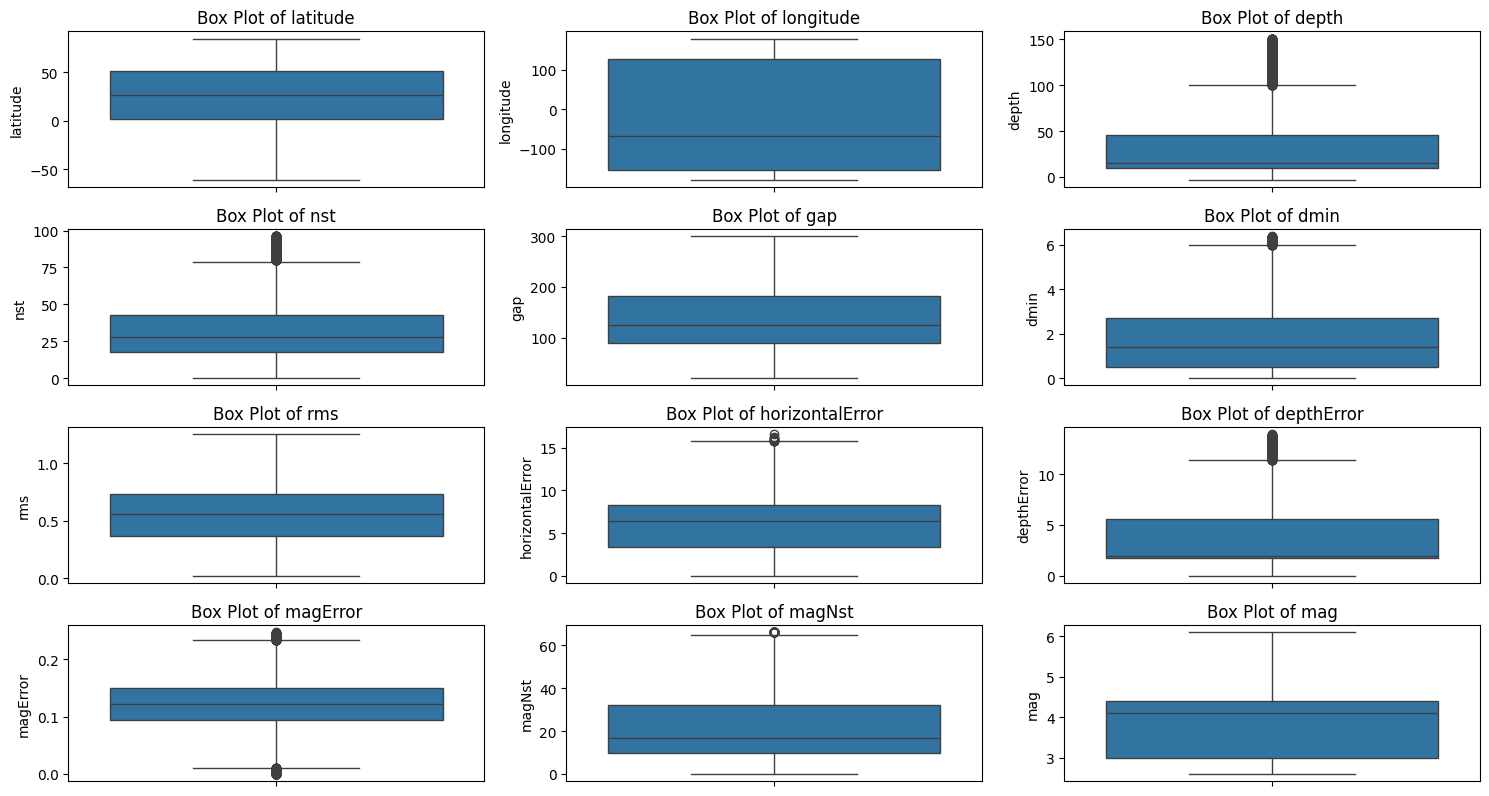

In [28]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    sns.boxplot(y=df_clean[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

### Skewness of numerical features

In [29]:
from scipy.stats import skew

# Select numerical columns
numeric_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Calculate skewness
skewness = df_clean[numeric_columns].apply(lambda x: skew(x.dropna()))
print(skewness)

latitude          -0.472385
longitude          0.228128
depth              1.487844
nst                1.038545
gap                0.536708
dmin               0.907370
rms                0.083123
horizontalError    0.127175
depthError         1.093629
magError           0.427316
magNst             1.062328
mag               -0.181718
dtype: float64


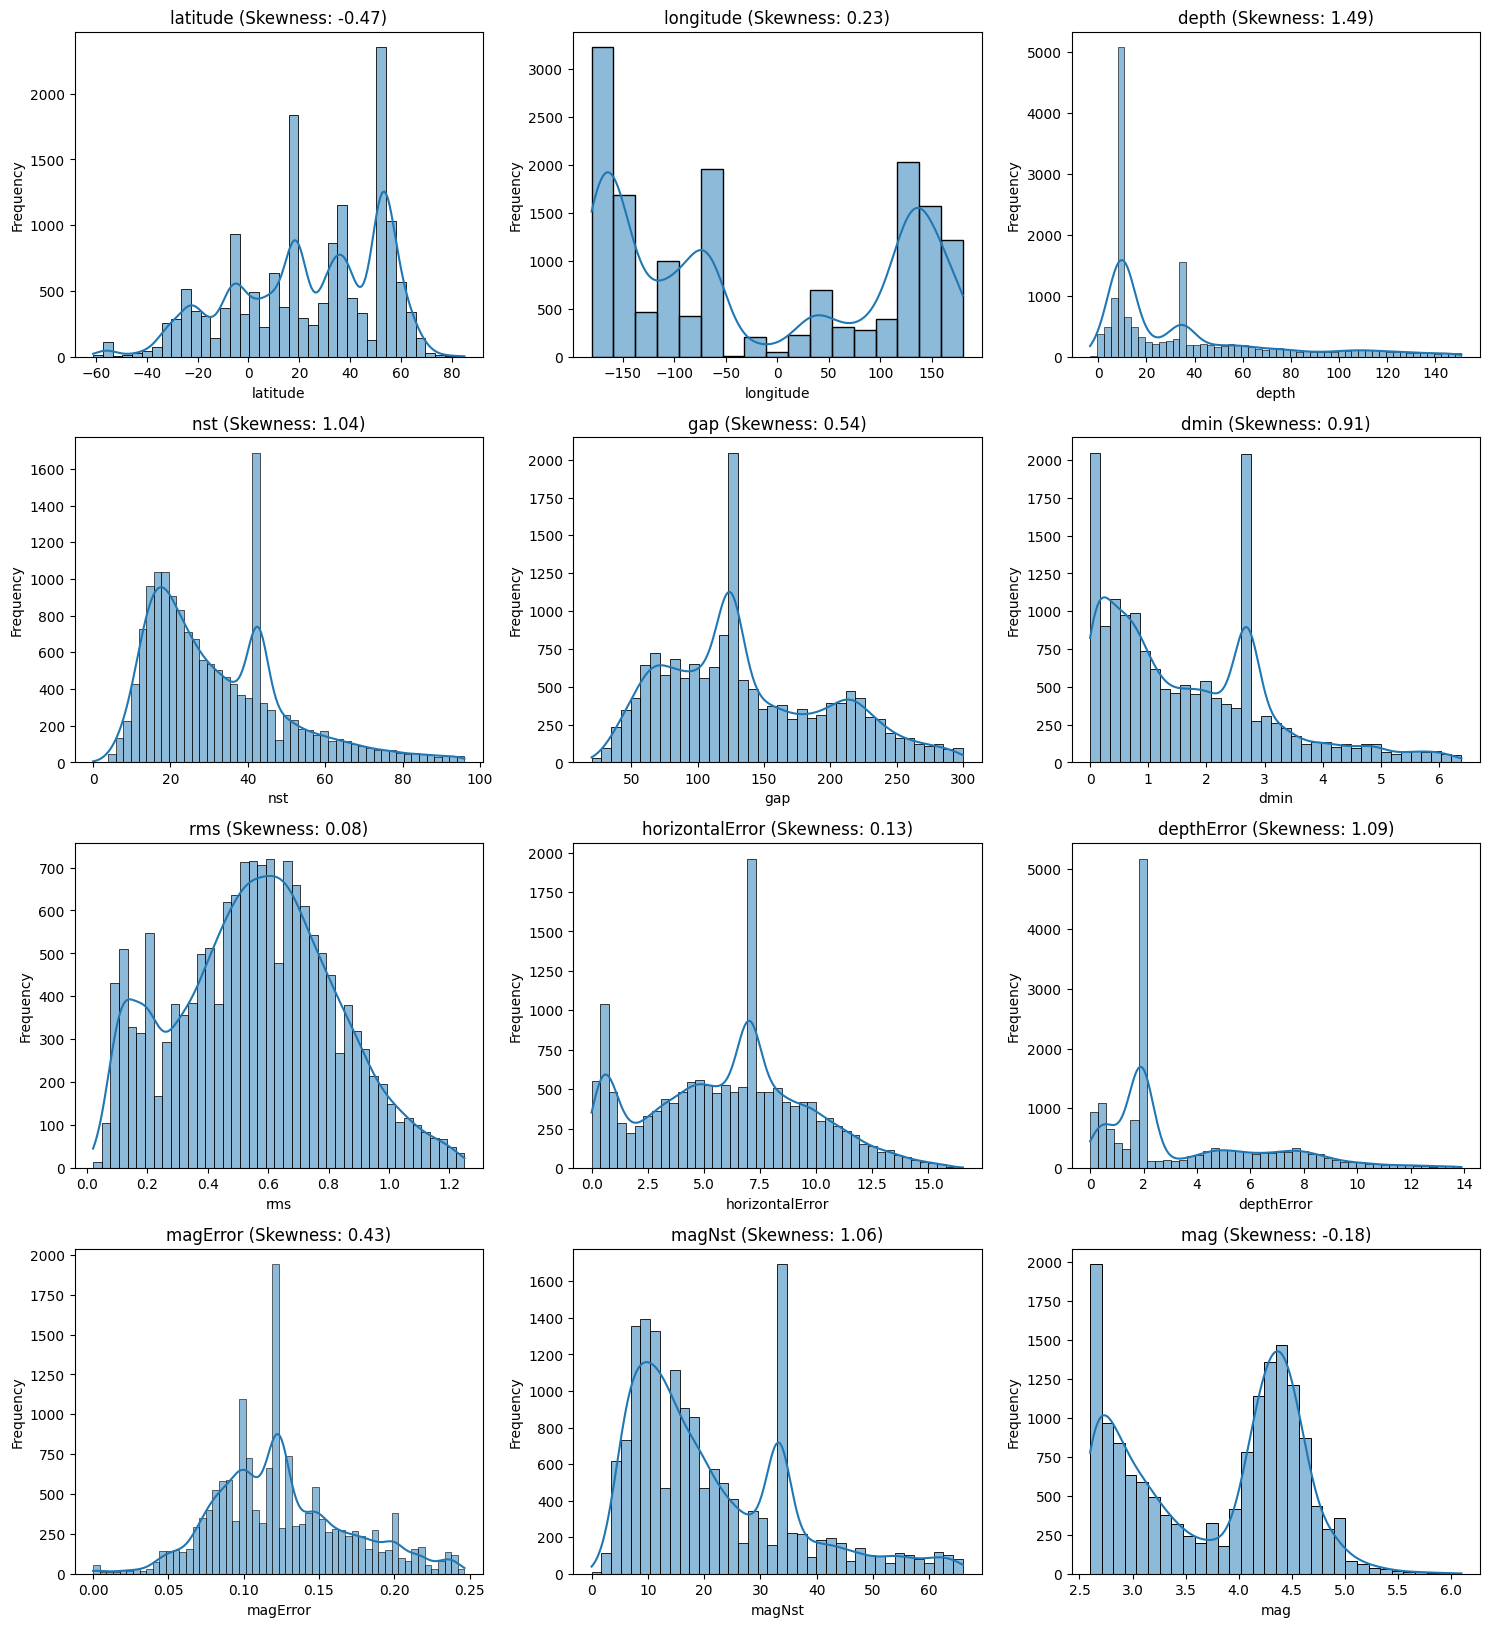

In [30]:
# Visualize distributions with histograms and KDE plots
plt.figure(figsize=(15, 20))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    sns.histplot(df_clean[column], kde=True)
    plt.title(f'{column} (Skewness: {skewness[column]:.2f})')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [31]:
from scipy.special import boxcox1p

# Apply Box-Cox transformation
df_boxcox_transformed = df_clean.copy()
for column in numeric_columns:
    if (df_boxcox_transformed[column] <= 0).any():
        df_boxcox_transformed[column] = boxcox1p(df_boxcox_transformed[column] - df_boxcox_transformed[column].min() + 1, 0.15)
    else:
        df_boxcox_transformed[column] = boxcox1p(df_boxcox_transformed[column], 0.15)

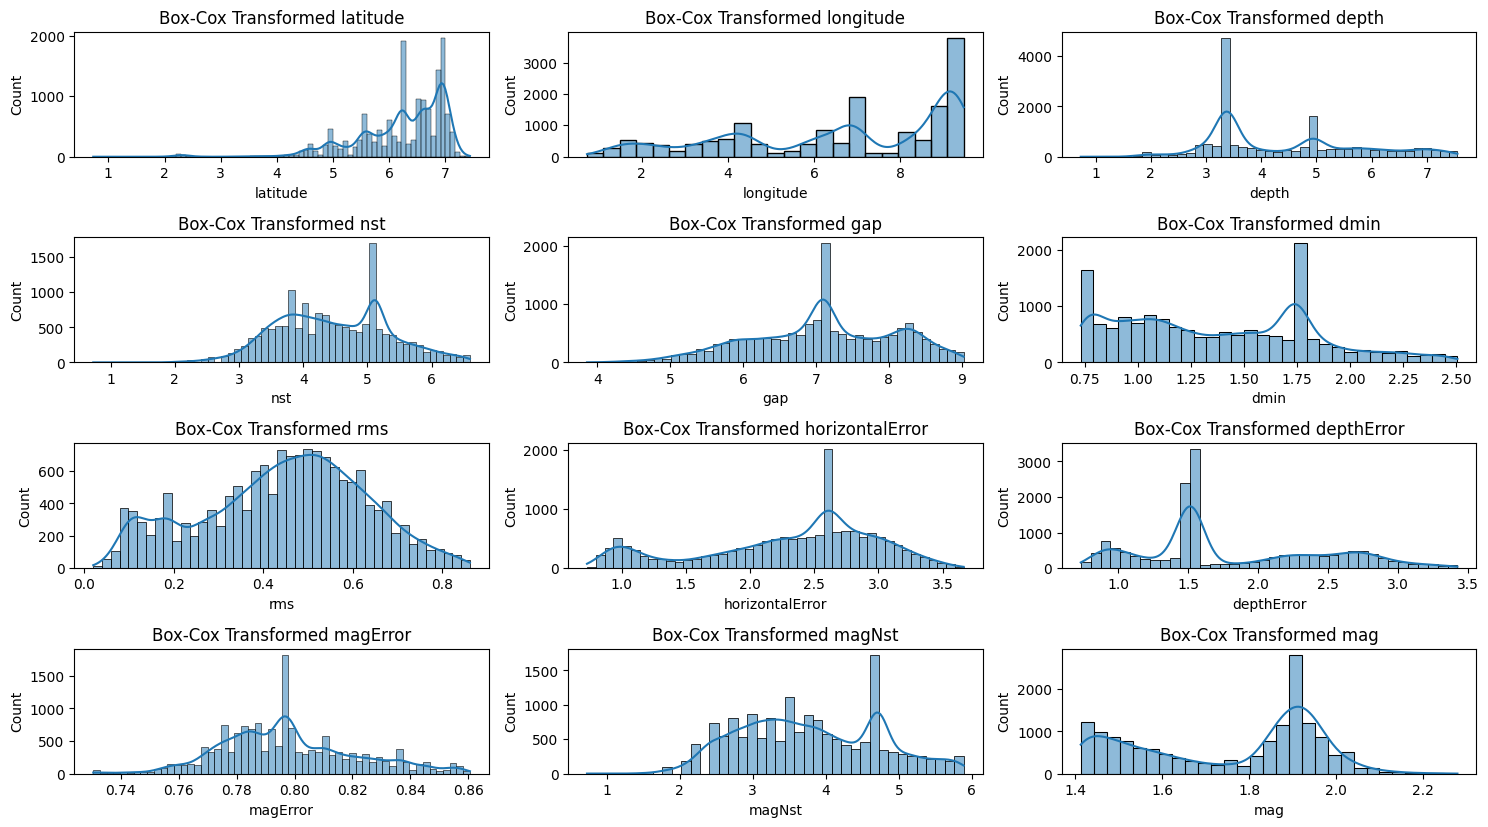

In [32]:
# Visualize distributions after Box-Cox transformation
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    sns.histplot(df_boxcox_transformed[column], kde=True)
    plt.title(f'Box-Cox Transformed {column}')
plt.tight_layout()
plt.show()

In [33]:
# Combine skewness values into a DataFrame for comparison
skewness_boxcox = df_boxcox_transformed[numeric_columns].apply(lambda x: skew(x.dropna()))

skewness_comparison = pd.DataFrame({
    'Original': df_clean[numeric_columns].apply(lambda x: skew(x.dropna())),
    'Box-Cox': skewness_boxcox
})

print(skewness_comparison)

                 Original   Box-Cox
latitude        -0.472385 -1.587964
longitude        0.228128 -0.551603
depth            1.487844  0.596194
nst              1.038545  0.088300
gap              0.536708 -0.237859
dmin             0.907370  0.341049
rms              0.083123 -0.214278
horizontalError  0.127175 -0.648021
depthError       1.093629  0.503764
magError         0.427316  0.377488
magNst           1.062328  0.167793
mag             -0.181718 -0.299101


#### The original distribution was fairly symmetrical, with Box-Cox maintaining a more balanced distribution.

### Exploratory Data Analysis

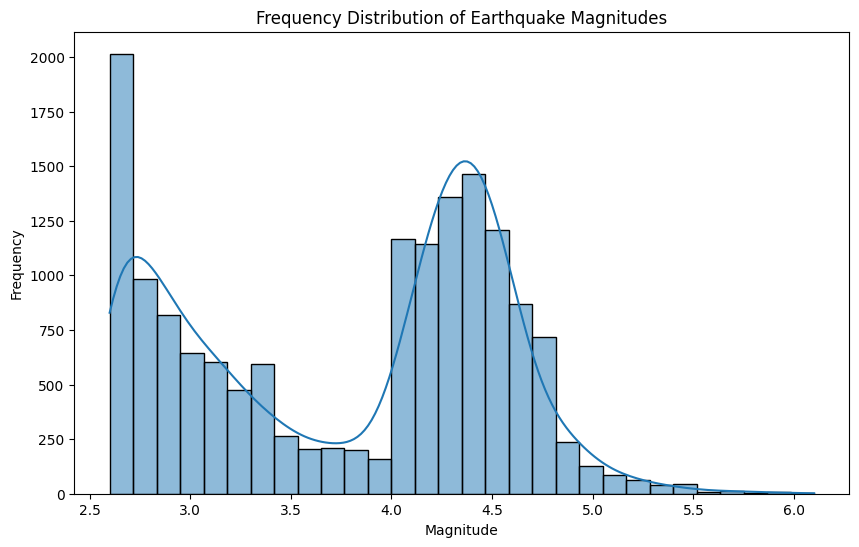

In [34]:
# Plot the histogram of earthquake magnitudes
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['mag'], bins=30, kde=True)
plt.title('Frequency Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

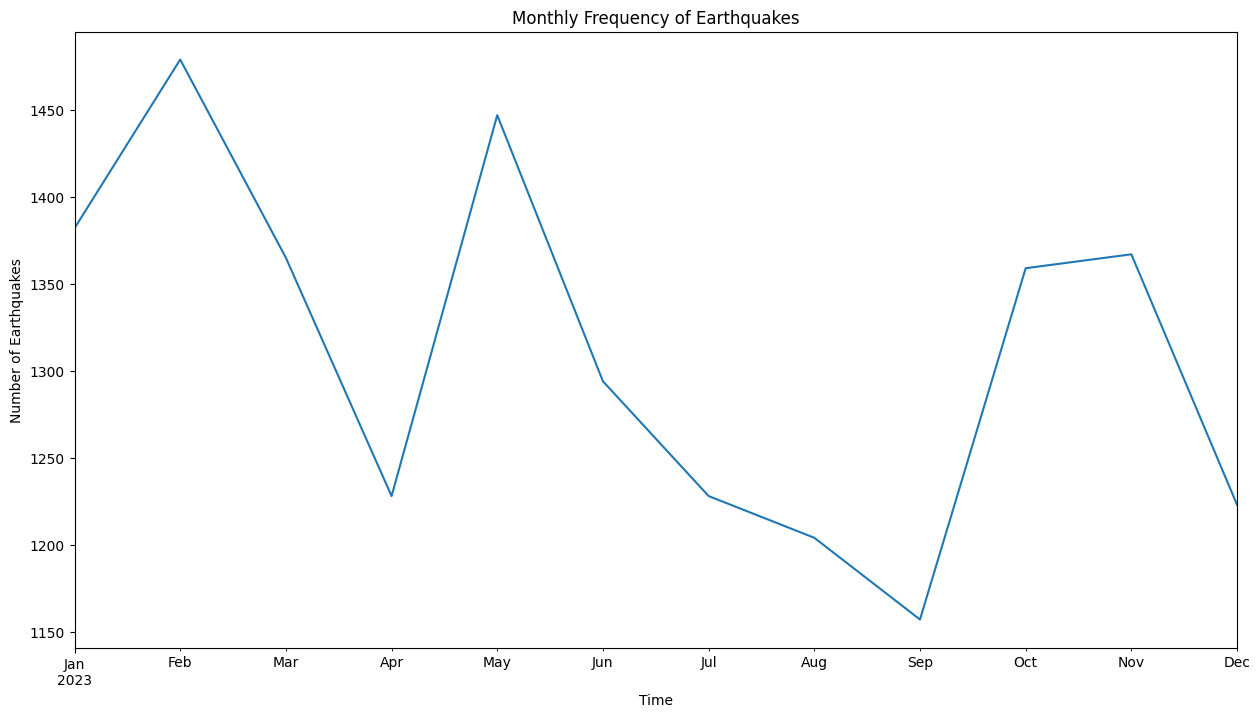

In [35]:
# Convert the 'time' column to datetime if it isn't already
df_clean['time'] = pd.to_datetime(df_clean['time'])

# Set the 'time' column as the index
df_clean.set_index('time', inplace=True)

# Resample the data by month and count the number of earthquakes
monthly_earthquakes = df_clean['mag'].resample('M').count()

# Plot the time series
plt.figure(figsize=(15, 8))
monthly_earthquakes.plot()
plt.title('Monthly Frequency of Earthquakes')
plt.xlabel('Time')
plt.ylabel('Number of Earthquakes')
plt.show()

### Feature Engineering
We perform "label encoding" to convert categorical values into numerical data


In [36]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = df_clean.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

# Initialize LabelEncoder
label_encoders = {}

# Apply label encoding to each categorical column
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df_clean[col] = label_encoders[col].fit_transform(df_clean[col])

Categorical columns: Index(['magType', 'net', 'updated', 'place', 'type', 'status',
       'locationSource', 'magSource'],
      dtype='object')


In [37]:
df_clean.head(1)

,latitude,longitude,depth,magType,nst,gap,dmin,rms,net,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,mag
time,,,,,,,,,,,,,,,,,,,,
2023-01-01 01:41:43.755000+00:00,7.1397,126.738,79.194,0,32.0,104.0,1.152,0.47,11,198,3947,1,5.51,7.445,0.083,43.0,1,12,14,4.5


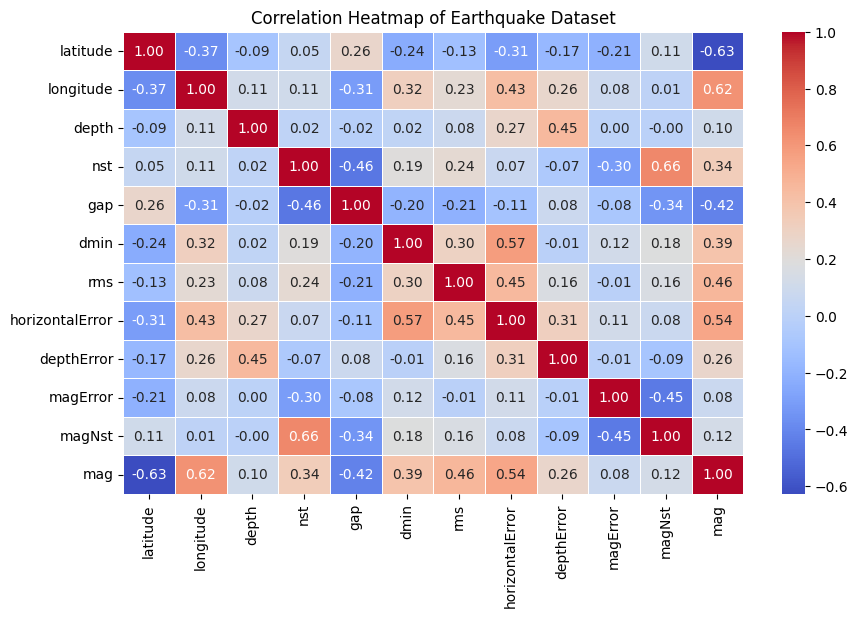

In [38]:
# Compute the correlation matrix
correlation_matrix = df_clean[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Earthquake Dataset')
plt.show()

#### Positive Correlation: latitude and mag, longitude and mag, nst and magNst.
#### Negative Correlation: latitude and mag, latitude and longitude, and horizontalError and gap.
#### No Correlation: depth and mag, nst and mag, and depthError and mag.

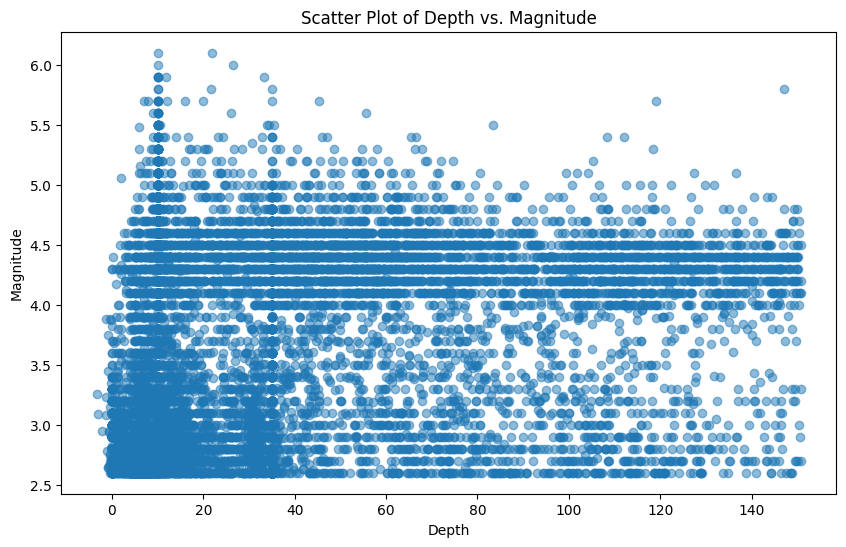

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['depth'], df_clean['mag'], alpha=0.5)
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.title('Scatter Plot of Depth vs. Magnitude')
plt.show()

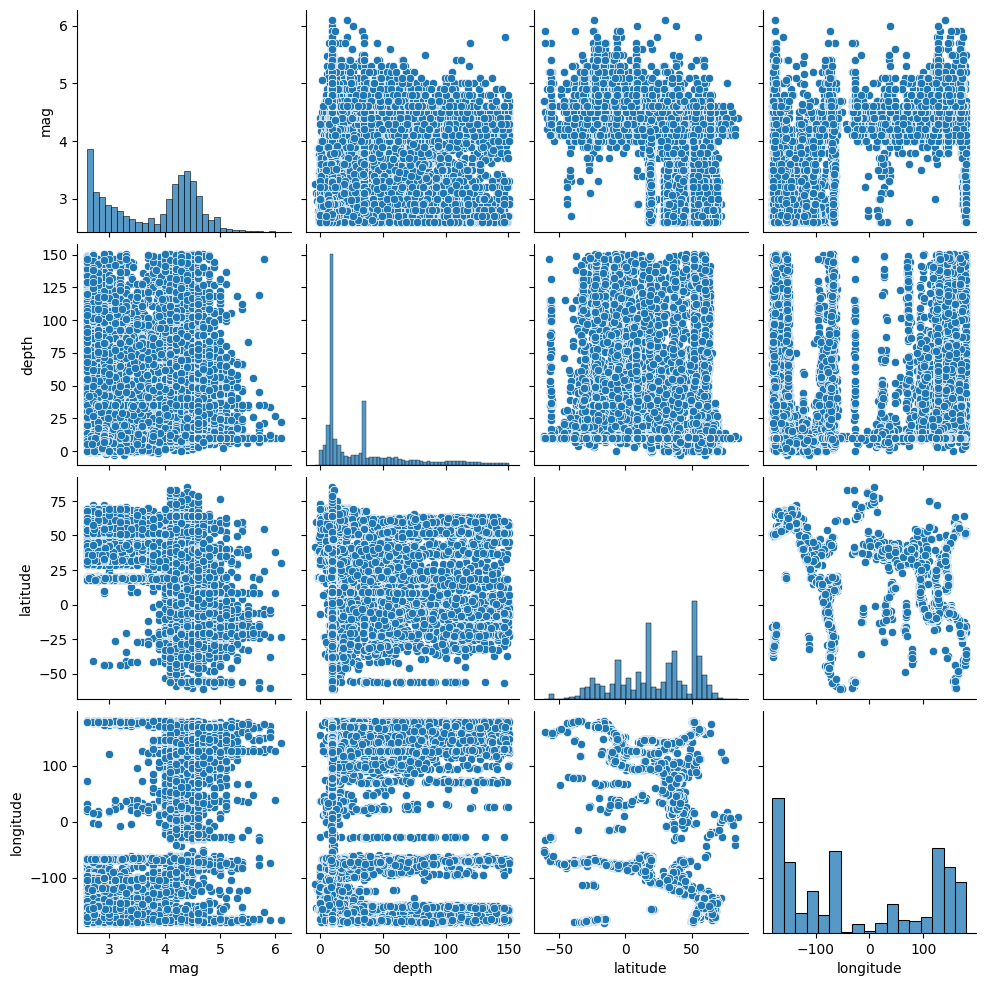

In [40]:
sns.pairplot(df_clean, vars=['mag', 'depth', 'latitude', 'longitude'])
plt.show()

#### Magnitude: 
The majority of earthquakes in the dataset have magnitudes between 2.5 and 6.5. Magnitude does not show a strong correlation with depth, latitude, or longitude.
#### Depth: 
Earthquake depths vary widely, but there are some depths where earthquakes are more common.
#### Geographical Distribution: 
There are certain regions (clusters in the latitude and longitude plots) where earthquakes are more frequent.Magnitudes and depths do not show clear geographical patterns.

### Split Data into Training and Testing Sets

In [41]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X = df_clean.drop(columns=['mag'])
y = df_clean['mag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure all columns are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

### Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler

# Applying StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the standardized data
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())
print(pd.DataFrame(X_test_scaled, columns=X_test.columns).head())

   latitude  longitude     depth   magType       nst       gap      dmin  \
0 -0.560367   1.133282 -0.672313 -0.825482 -1.137931 -0.108080 -0.763931   
1 -0.668095  -0.420104  1.416288 -0.825482 -0.348394 -1.153368  0.250646   
2  1.086430  -1.057885  0.019749  0.845530  0.271957  1.210590 -0.458647   
3  0.487578   0.448979 -0.747272 -0.825482 -0.517580  0.213546 -1.072015   
4 -0.939254   1.277575 -0.677669 -0.825482  0.497539 -0.863904  3.258665   

        rms       net   updated     place      type  horizontalError  \
0 -0.942351  0.476742 -0.875498 -1.342385 -0.095663         0.977733   
1  1.361210  0.476742  0.866011 -1.083420 -0.095663         0.490227   
2 -0.097712  0.476742  0.418374 -1.621061 -0.095663         0.014124   
3 -0.596817  0.476742 -1.098966 -0.736819 -0.095663        -1.046417   
4 -0.059319  0.476742 -0.686356 -1.606505 -0.095663         0.293513   

   depthError  magError    magNst  status  locationSource  magSource  
0    0.636213  1.132233 -0.869331  0.05

### Feature Selection
Use SelectKBest with a suitable statistical test to select the best features.

In [43]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select the top k features 
k = 5
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['latitude', 'longitude', 'magType', 'net', 'horizontalError'], dtype='object')


### Build the ML model

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regressor': SVR(),
    'MLP Regressor': MLPRegressor(max_iter=1000),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'R²': r2}
    print(f'{name} - MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R²: {r2}')

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

Linear Regression - MSE: 0.12365439550262987, MAE: 0.26866633610372537, RMSE: 0.35164526941596963, R²: 0.7853437049647546
Support Vector Regressor - MSE: 0.059431611244311615, MAE: 0.17485059068203648, RMSE: 0.2437859947665403, R²: 0.8968304407957124
MLP Regressor - MSE: 0.0641714332837526, MAE: 0.19135619864515283, RMSE: 0.2533208109961608, R²: 0.8886024062484799
Random Forest Regressor - MSE: 0.05191794152802761, MAE: 0.1639461209842517, RMSE: 0.22785508887893552, R²: 0.9098737013839036
Gradient Boosting Regressor - MSE: 0.0605650485701861, MAE: 0.1813963265833022, RMSE: 0.2460996720237272, R²: 0.894862864503435
AdaBoost Regressor - MSE: 0.11214635117104065, MAE: 0.2684843578245243, RMSE: 0.3348825931144237, R²: 0.8053209500054921
                                  MSE       MAE      RMSE        R²
Linear Regression            0.123654  0.268666  0.351645  0.785344
Support Vector Regressor     0.059432  0.174851  0.243786  0.896830
MLP Regressor                0.064171  0.191356  0.25

#### Best Performing Model: The Random Forest Regressor consistently outperforms the other models across all metrics (MSE, MAE, RMSE, and R²). Support Vector Regressor (SVR) and Gradient Boosting Regressor also perform well, with relatively low MSE and high R² scores

#### Hyperparameter Tuning

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# Select features based on correlation with the target variable 'mag'
selected_features = ['latitude', 'longitude', 'magType', 'net', 'horizontalError']
target = 'mag'


# Function to perform Grid Search with cross-validation
def perform_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

# Define hyperparameter grids
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [47]:
# Perform Grid Search for each model
# Random Forest
rf_best_model, rf_best_params = perform_grid_search(RandomForestRegressor(random_state=42), rf_param_grid, X_train, y_train)
print(f"Best Random Forest Params: {rf_best_params}") 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Random Forest Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


In [48]:
# Evaluate the model on the test set
y_pred = rf_best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.16
Mean Squared Error (MSE): 0.05
Root Mean Squared Error (RMSE): 0.23
R-squared (R2): 0.91


In [49]:
# Save the trained model to a file
from joblib import dump
dump(rf_best_model, 'rf_best_model.joblib')

['rf_best_model.joblib']

#### Trained model is 'rf_best_model.joblib'

### Visualize Model Performance : Feature Importance

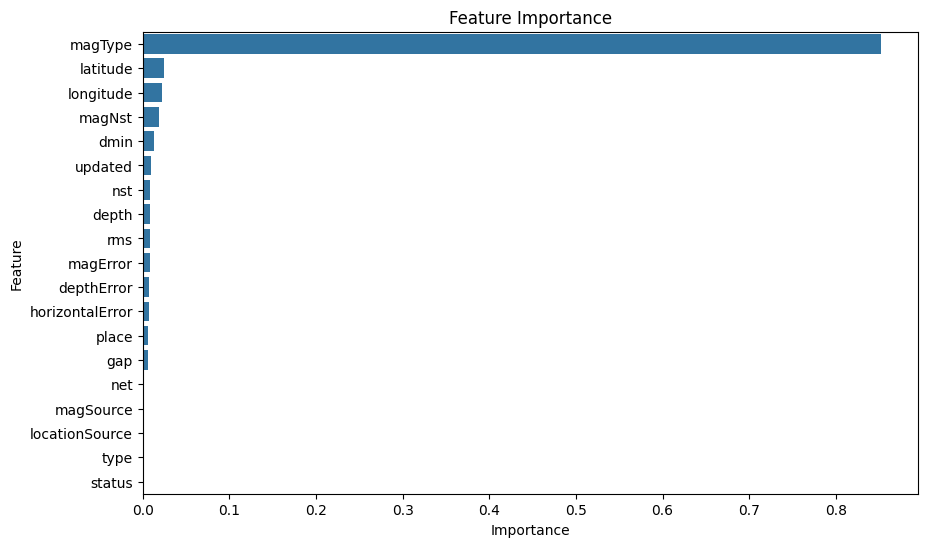

In [50]:
# Plot feature importance
feature_importances = pd.DataFrame(rf_best_model.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Predictions vs. Actual Values

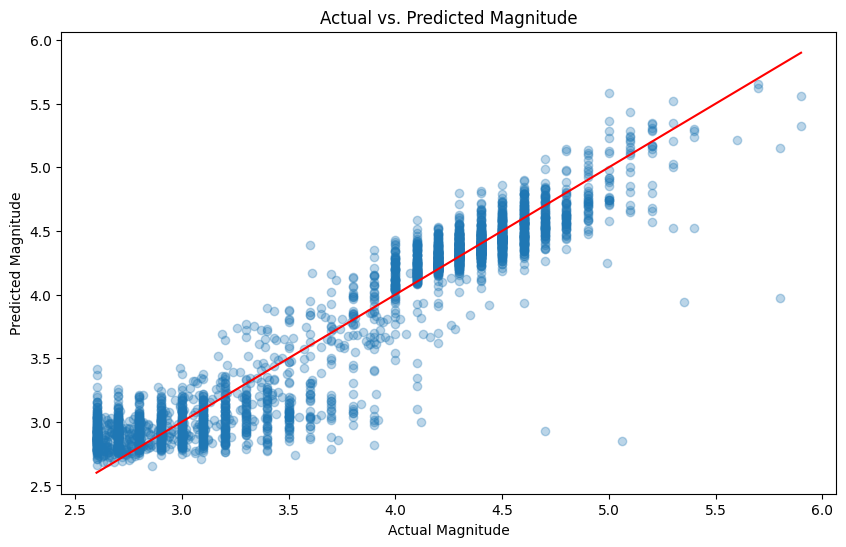

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Actual vs. Predicted Magnitude')
plt.show()

### Predict magnitude of earthquake using test data

In [76]:
import joblib

# Load the model using joblib
loaded_model = joblib.load('rf_best_model.joblib')

# Predict the magnitudes
predicted_magnitudes = loaded_model.predict(X_test_scaled)

# Display the predictions
print("Predicted Magnitudes:")
print(predicted_magnitudes)

Predicted Magnitudes:
[4.50391555 4.30226429 4.51005642 ... 4.30251429 2.98269831 4.50875722]


### Predictions on test data : When predicting the magnitude of earthquakes using test data, the model consistently predicted a magnitude of approximately 4.5


### Test with unseen data

In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor  
import joblib

In [68]:
feature_names = X_train.columns
print("Feature names:", feature_names)


Feature names: Index(['latitude', 'longitude', 'depth', 'magType', 'nst', 'gap', 'dmin',
       'rms', 'net', 'updated', 'place', 'type', 'horizontalError',
       'depthError', 'magError', 'magNst', 'status', 'locationSource',
       'magSource'],
      dtype='object')


In [69]:
import pandas as pd
import numpy as np

data = {
    'latitude': [34.05, 35.68, 36.77],
    'longitude': [-118.25, -121.89, -119.42],
    'depth': [10.0, 20.5, 15.2],
    'magType': [1, 2, 3],  
    'nst': [20, 15, 25],
    'gap': [50, 60, 55],
    'dmin': [0.1, 0.2, 0.15],
    'rms': [0.3, 0.4, 0.35],
    'net': [1, 2, 3],  
    'updated': [1, 2, 3], 
    'place': [1, 2, 3],  
    'type': [1, 2, 3],  
    'horizontalError': [0.5, 0.6, 0.55],
    'depthError': [0.1, 0.2, 0.15],
    'magError': [0.05, 0.07, 0.06],
    'magNst': [10, 12, 11],
    'status': [1, 2, 3], 
    'locationSource': [1, 2, 3],  
    'magSource': [1, 2, 3] 
}

# Convert to DataFrame
df_unseen = pd.DataFrame(data)

# Display the sample DataFrame
print("Unseen DataFrame:")
print(df_unseen)


Unseen DataFrame:
   latitude  longitude  depth  magType  nst  gap  dmin   rms  net  updated  \
0     34.05    -118.25   10.0        1   20   50  0.10  0.30    1        1   
1     35.68    -121.89   20.5        2   15   60  0.20  0.40    2        2   
2     36.77    -119.42   15.2        3   25   55  0.15  0.35    3        3   

   place  type  horizontalError  depthError  magError  magNst  status  \
0      1     1             0.50        0.10      0.05      10       1   
1      2     2             0.60        0.20      0.07      12       2   
2      3     3             0.55        0.15      0.06      11       3   

   locationSource  magSource  
0               1          1  
1               2          2  
2               3          3  


In [75]:
loaded_model = joblib.load('rf_best_model.joblib')

# Predict the magnitudes
predicted_magnitudes = loaded_model.predict(df_unseen_scaled)

# Display the predictions
print("Predicted Magnitudes:")
print(predicted_magnitudes)

Predicted Magnitudes:
[4.30226429 4.30226429 4.30226429]


###  Predictions on Unseen Data : When predicting the magnitude of earthquakes using unseen data, the model consistently predicted a magnitude of approximately 4.302.